Para um primeiro contato com esses dados vou iniciar o projeto reduzindo o escopo separando os arquivos entre os recomendados e os não recomendados , juntamente com a criação de uma cópia na qual serão feitas as análises .

In [104]:
import pandas as pd
import matplotlib.pyplot as plt


doc_item = "2016.csv/Recomendados/item.csv"
# doc_lici = "2016.csv/Recomendados/licitacao.csv"
# doc_item = "2017.csv/Recomendados/item.csv"
# doc_lici = "2017.csv/Recomendados/licitacao.csv"
# doc_item = "2018.csv/Recomendados/item.csv"
# doc_lici = "2018.csv/Recomendados/licitacao.csv"
# doc_item = "2019.csv/Recomendados/item.csv"
# doc_lici = "2019.csv/Recomendados/licitacao.csv"

path_2_save = f"{doc_item}_simplified.csv"
# path_2_save = f"{doc_lici}_simplified.csv"


df_item = pd.read_csv(doc_item , delimiter=",")[["NR_LICITACAO","CD_TIPO_MODALIDADE","DS_ITEM" , "VL_UNITARIO_HOMOLOGADO" ,"QT_ITENS" ,
    "VL_TOTAL_HOMOLOGADO","CD_ORGAO" , "DT_REF_VALOR_ESTIMADO"]]

df_item["NR_LICITACAO___CD_TIPO_MODALIDADE"] = df_item["NR_LICITACAO"].astype(int).astype(str) + "__" + df_item["CD_TIPO_MODALIDADE"].astype(str)
df_item.drop(['NR_LICITACAO', 'CD_TIPO_MODALIDADE'], axis=1, inplace=True)
cols = df_item.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_item = df_item[cols]


# df_item.to_csv(path_2_save , sep = ",")
df_item.head(15)


<ipython-input-104-7f93476d911e>:18: DtypeWarning: Columns (19,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_item = pd.read_csv(doc_item , delimiter=",")[["NR_LICITACAO","CD_TIPO_MODALIDADE","DS_ITEM" , "VL_UNITARIO_HOMOLOGADO" ,"QT_ITENS" ,


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 201-05-16 00:00:00

- Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
    - listar os 10 itens mais comprados e qual sua frequencia
    - listar os 10 itens nos quais mais se gasta em compras e qual sua frequencia
    - fazer um histograma para verfificar 

In [3]:
#OBTER A FREQUENCIA DOS MAIS COMPRADOS :
df_buy_freq = None
df_buy_freq = df_item[["DS_ITEM" , "QT_ITENS"]]
# df_buy_freq.columns = ["DS_ITEM" , "QT_ITENS"]

df_buy_freq = df_buy_freq.groupby(["DS_ITEM"] , as_index =False).sum()#

df_buy_freq.loc[df_buy_freq["DS_ITEM"]=="Esfregão de aço"]
box_plot = df_buy_freq.boxplot("QT_ITENS" )# , showfliers=False)
# plt.savefig("assets//2016//box_plot_QT_ITENS.png")
df_buy_freq.sort_values("QT_ITENS", ascending= False).head(12)
# print(df_buy_freq)
plt.close()

Considerando que o valor do campo quantidade de itens(QT_ITENS) para os itens "Lote acima de 50.000m² com Edificação" e "Lote acima de 50.000m²" não fazia
sentido o tratei como um ruído e obtive o resultado abaixo .
- OS ITENS MAIS COMPRADOS EM 2016 :

|   |	DS_ITEM	| QT_ITENS | 
| :---  |   :----:  |   ---:|
|233151	| OMEPRAZOL 20MG	| 14487032.0|
|233132	|OMEPRAZOL 20 MG	|10864630.0|
|233148	|OMEPRAZOL 20 mg - Capsula	|10700000.0|
|173175	|HIDROCLOROTIAZIDA 25 mg - Comprimido	|10447550.0|
|233203	|OMEPRAZOL CÁPSULA 20MG	|10200000.0|
|300697	|SINVASTATINA 20MG	|9519100.0|
|254055	|PROMETAZINA 25MG ...	|9000000.0|
|6974	|ACIDO ACETILSALICILICO 100 mg - Comprimido	|8833200.0|
|234443	|Omeprazol 20mg	|8084628.0|
|234454	|Omeprazol 20mg, cápsula.	|7604938.0|

![image info](./assets/2016/item__box_plot_QT_ITENS.png)

Index(['DS_ITEM', 'QT_ITENS', 'VL_TOTAL_HOMOLOGADO'], dtype='object')


,DS_ITEM,QT_ITENS,VL_TOTAL_HOMOLOGADO
260261,Pavimentaçao com pedra irregular de basalto Co...,4800.00,8.027202e+08
251131,POSSÍVEL CONTRATAÇÃO DE EMPRESA ESPECIALIZADA ...,1.00,4.630649e+08
23855,"Alimentação referente a R$ 25,00",5380055.00,1.213080e+08
195367,LOCAÇÃO E MANUTENÇÃO DE SISTEMA INFORMATIZADO,1.00,9.083300e+07
107998,Contratação de empresa especializada para exec...,1.00,8.096097e+07
336685,"Transporte Comercial c/ Caminhão c/ caminhão, ...",8468.55,7.243354e+07
260245,"Pavers de Concreto Cor Natural (10x20x6,0cm)",823.39,3.900368e+07
23854,"Alimentação referente a R$ 12,50",3051535.00,3.442050e+07
311463,Serviço de vigilância Armada e Desarmada.,1.00,2.901000e+07
244680,PINTURA ACRÍLICA (SEMI-BRILHO) SOBRE REBOCO - ...,1100000.00,2.797300e+07


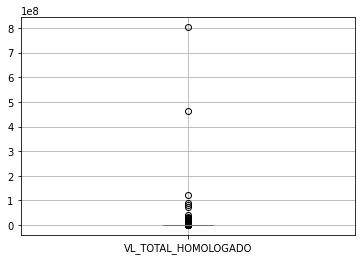

In [10]:
#OBTER OS ITENS COM MAIOR IMPACTO FINANCEIRO :
df_buy_val = df_item[["DS_ITEM" , "QT_ITENS" , "VL_TOTAL_HOMOLOGADO"]].fillna(0)
# df_buy_val.columns = [ "DS_ITEM" , "QT_ITENS" , "VL_TOTAL_HOMOLOGADO" , "index"]
df_buy_val["VL_TOTAL_HOMOLOGADO"] = df_buy_val["VL_TOTAL_HOMOLOGADO"].apply(lambda x : x if (type(x) == type(1) or type(x) == type(1.0)) else 0 )
df_buy_val = df_buy_val.groupby(["DS_ITEM"] , as_index = False , dropna = False ).sum()#.reset_index()
print(df_buy_val.columns)

ax = plt.figure()
box_plot = df_buy_val.boxplot('VL_TOTAL_HOMOLOGADO')
# plt.savefig("assets//2016//item__box_plot_VL_TOTAL_HOMOLOGADO.png")
df_buy_val.sort_values("VL_TOTAL_HOMOLOGADO", ascending= False).head(35)
# print(df_item)
# df_buy_val


- OS ITENS DE MAIOR VALOR GASTO EM 2016 :

|       |   DS_ITEM	    |   QT_ITENS	|   VL_TOTAL_HOMOLOGADO|
| :---  |   :----:      |   :----:      |   ---:|
|260261	|Pavimentaçao com pedra irregular de basalto Co...|	4800.00	|8.027202e+08|
|251131	|POSSÍVEL CONTRATAÇÃO DE EMPRESA ESPECIALIZADA ...|	1.00	|4.630649e+08|
|23855	|Alimentação referente a R$ 25,00	|5380055.00	|1.213080e+08|
|195367	|LOCAÇÃO E MANUTENÇÃO DE SISTEMA INFORMATIZADO	|1.00	|9.083300e+07|
|107998	|Contratação de empresa especializada para exec...	|1.00	|8.096097e+07|
|336685	|Transporte Comercial c/ Caminhão c/ caminhão, ...	|8468.55	|7.243354e+07|
|260245	|Pavers de Concreto Cor Natural (10x20x6,0cm)	|823.39	|3.900368e+07|
|23854	|Alimentação referente a R$ 12,50	|3051535.00	|3.442050e+07|
|311463	|Serviço de vigilância Armada e Desarmada.	|1.00	|2.901000e+07|
|244680	|PINTURA ACRÍLICA (SEMI-BRILHO) SOBRE REBOCO - ...	|1100000.00	|2.797300e+07|

![image info](./assets/2016/item__box_plot_VL_TOTAL_HOMOLOGADO.png)

<p>Nesse ano percebe-se que a principal razão de gasto foi referente a serviços <p>

* É possível identificar algum padrão nas compras?

  - histograma de preços totais , preço unitários , precos previsto 
  
  - (comparar o de preços previstos com o de homologados )

O valor total gasto foi de 5676952710.419999
Os 10 orgãos de maior gasto custaram juntos 2778118385.05
Isso significa que só o gasto dos 10 maiores corresponde a 48.93678927342106 %


,CD_ORGAO,QT_ITENS,VL_TOTAL_HOMOLOGADO
743,88035,1.384510e+05,8.056780e+08
792,88228,3.050177e+04,4.631268e+08
80,44500,1.651997e+08,4.444461e+08
410,63000,6.329895e+07,2.632173e+08
466,66700,1.140640e+07,1.882454e+08
322,57500,1.918254e+07,1.532720e+08
547,73200,5.213618e+05,1.526928e+08
795,88258,1.210889e+08,1.364221e+08
163,49100,4.287184e+07,9.049560e+07
306,56800,1.877445e+07,8.052228e+07


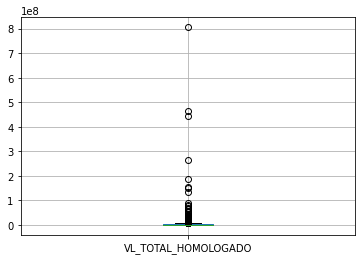

In [180]:
df_buy_stan = df_item[["CD_ORGAO" , "DS_ITEM" , "QT_ITENS" , "VL_TOTAL_HOMOLOGADO" ]].fillna(0)
df_buy_stan["VL_TOTAL_HOMOLOGADO"] = df_buy_stan["VL_TOTAL_HOMOLOGADO"].apply(lambda x : x if type(x) == type(1) or type(x) == type(1.0) else 0 )
df_buy_stan = df_buy_stan.groupby(["CD_ORGAO"] , as_index = False , dropna = False  ).sum()#.reset_index()
df_buy_stan = df_buy_stan.sort_values("VL_TOTAL_HOMOLOGADO", ascending= False)

ax = plt.figure()
box_plot = df_buy_stan.boxplot('VL_TOTAL_HOMOLOGADO')

val_total  = df_buy_stan['VL_TOTAL_HOMOLOGADO'].sum()
biggers_10 = df_buy_stan['VL_TOTAL_HOMOLOGADO'].head(10).sum()
print(f"O valor total gasto foi de {val_total}\nOs 10 orgãos de maior gasto custaram juntos {biggers_10}")
print(f"Isso significa que só o gasto dos 10 maiores corresponde a {(biggers_10/val_total)*100} %")
# plt.savefig("assets//2016//item__box_plot_VL_TOTAL_HOMOLOGADO_POR_CD_ORGAO.png")

df_buy_stan.head(10)


(88035, [1161314.4, 968073.6599999999, 14700.0, 802720176.0], ['2016-06-30', '2016-07-06', '2016-07-14', '2016-12-11'])


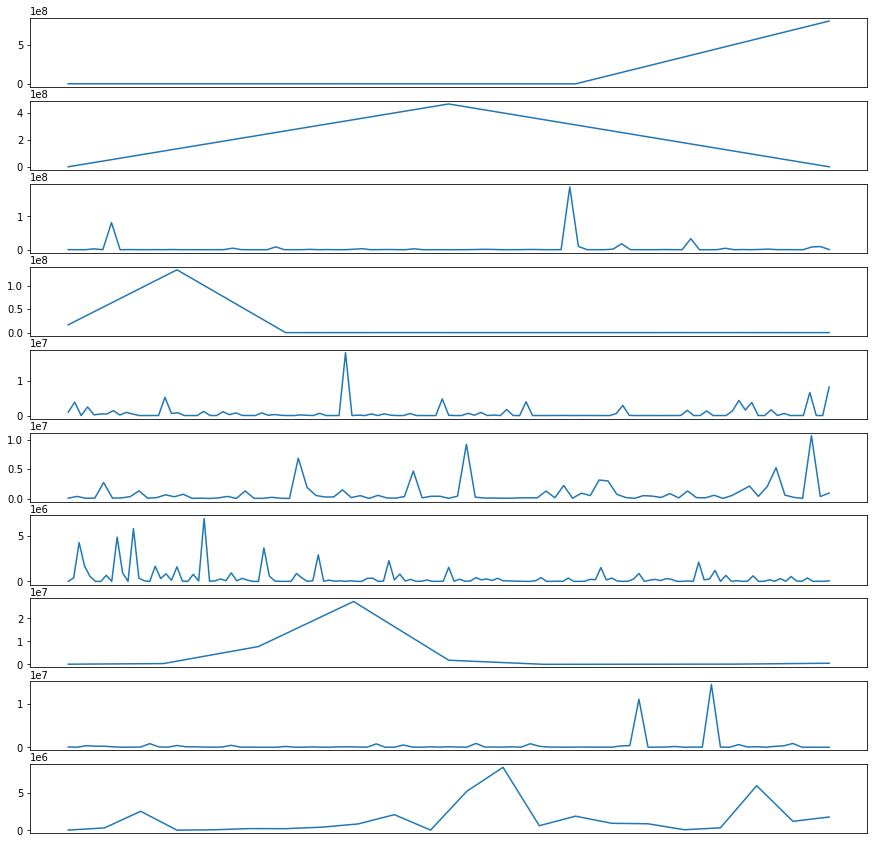

<Figure size 12960x6480 with 0 Axes>

,CD_ORGAO,VL_TOTAL_HOMOLOGADO,DT_REF_VALOR_ESTIMADO
8,88035,"[1161314.4, 968073.6599999999, 14700.0, 802720...","[2016-06-30, 2016-07-06, 2016-07-14, 2016-12-11]"
9,88228,"[290.0, 463124916.0, 1548.49]","[2016-01-29, 2016-06-30, 2016-08-31]"
0,44500,"[276000.0, 45511.67, 1978.0, 2609331.27, 64728...","[2015-07-16, 2015-10-01, 2015-10-13, 2015-11-0..."
7,73200,"[16667384.94, 134046232.79999998, 13019.8, 549...","[2013-03-31, 2015-03-31, 2016-04-30, 2016-08-1..."
2,49100,"[939715.42, 3868504.25, 5439.9, 2473618.18, 19...","[2016-03-11, 2016-03-18, 2016-03-21, 2016-03-3..."
5,55600,"[57036.0, 350400.0, 36379.04, 60000.0, 2708000...","[2016-05-05, 2016-05-09, 2016-05-10, 2016-05-1..."
3,53400,"[809.1800000000001, 395590.96, 4286258.46, 170...","[1908-07-20, 2015-04-01, 2015-07-01, 2015-07-1..."
6,60000,"[101600.47, 370000.07, 7754293.299999999, 2727...","[2015-03-10, 2016-02-16, 2016-02-23, 2016-02-2..."
1,46900,"[58129.99, 9234.4, 348300.0, 239880.0, 232703....","[2016-01-22, 2016-02-03, 2016-02-15, 2016-02-1..."
4,54400,"[21997.45, 311452.06, 2542880.61, 11004.0, 591...","[2014-05-01, 2014-11-01, 2015-01-01, 2015-01-1..."


In [179]:
#CUSTO DE CADA ORGAO AO LONGO DO ANO :
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df_buy_stan = df_item[["CD_ORGAO" , "VL_TOTAL_HOMOLOGADO" , "DT_REF_VALOR_ESTIMADO"]].fillna(0)


#Limpeza de dados pré Análise :
df_buy_stan = df_buy_stan.query("DT_REF_VALOR_ESTIMADO != 0 ")
df_buy_stan["VL_TOTAL_HOMOLOGADO"] = df_buy_stan["VL_TOTAL_HOMOLOGADO"].apply(lambda x : x if type(x) == type(1) or type(x) == type(1.0) else 0 )
df_buy_stan = df_buy_stan.query("VL_TOTAL_HOMOLOGADO != 0 ")

df_buy_stan = df_buy_stan.loc[df_buy_stan["CD_ORGAO"].isin([88035 , 88228 , 44500 , 73200 , 49100 , 55600 , 53400 , 60000 ,
                46900 , 54400 ])]


# df_buy_stan["DT_REF_VALOR_ESTIMADO"] = pd.to_datetime(df_buy_stan["DT_REF_VALOR_ESTIMADO"], format = '%Y-%m-%d' )                
df_buy_stan = df_buy_stan.groupby(["CD_ORGAO", "DT_REF_VALOR_ESTIMADO"] , as_index = False , dropna = False  ).sum()
df_buy_stan = df_buy_stan.groupby(["CD_ORGAO"] , as_index = False , dropna = False  ).agg({'VL_TOTAL_HOMOLOGADO':lambda x: list(x), 
                                          'DT_REF_VALOR_ESTIMADO':lambda x: list(x)})
df_buy_stan["f"] = df_buy_stan["VL_TOTAL_HOMOLOGADO"].apply(lambda x : sum(x) )
df_buy_stan = df_buy_stan.sort_values("f", ascending= False).drop('f', axis=1)



# fig = plt.figure()
fig , ax = plt.subplots(10 , figsize=(15,15))
print(list(zip(df_buy_stan["CD_ORGAO"],df_buy_stan["VL_TOTAL_HOMOLOGADO"] , df_buy_stan['DT_REF_VALOR_ESTIMADO' ] ))[0])
i = 0
for orgao,val , date  in zip(df_buy_stan["CD_ORGAO"],df_buy_stan["VL_TOTAL_HOMOLOGADO"] , df_buy_stan['DT_REF_VALOR_ESTIMADO' ] )  :

    ax[i].plot(date,val )
    # plt.xlim(["2016-1-1" , "2016-12-31" ])
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[i].tick_params(axis='x', labelrotation= 90 )
    
    # ax.set_ylim([0, 5])
    i += 1
    # plt.show()
    # plt.close()
    # fig , ax  = plt.subplots(1)

plt.figure(figsize=(180,90))
fig.savefig("assets//2016//valor_Dos_Orgaos_mais_Caros.png")
plt.show()
df_buy_stan


- INFORMAÇÕES RELATIVAS A 2016 :

    - São 818 orgãos.
    - O valor total gasto por eles foi de R$ 5676952710.42 (suponho que seja em reais)
    - Os 10 orgãos de maior gasto custaram juntos R$ 2778118385.05 (suponho que seja em reais)
    - Isso significa que só o gasto dos 10 maiores corresponde a 48.93678927342106 %

    
|CD_ORGAO	|QT_ITENS	|VL_TOTAL_HOMOLOGADO|
| :---      |   :----:  |               ---:|
|743	|88035	|1.384510e+05	|8.056780e+08
|792	|88228	|3.050177e+04	|4.631268e+08
|80	    |44500	|1.651997e+08	|4.444461e+08
|410	|63000	|6.329895e+07	|2.632173e+08
|466	|66700	|1.140640e+07	|1.882454e+08
|322	|57500	|1.918254e+07	|1.532720e+08
|547	|73200	|5.213618e+05	|1.526928e+08
|795	|88258	|1.210889e+08	|1.364221e+08
|163	|49100	|4.287184e+07	|9.049560e+07
|306	|56800	|1.877445e+07	|8.052228e+07

![image info](./assets/2016/item__box_plot_VL_TOTAL_HOMOLOGADO_POR_CD_ORGAO.png)


<p>
Como o campo "DT_REF_VALOR_ESTIMADO" não é de preenchimento obrigatório , fez-se necessária uma limpeza no sentido de tirar tudo que não pode-se virar série temporal dos gastos ao longo do ano para essas 10 de maior impacto financeiro . No final espara-se que os gastos mapeados ao longo do ano sejam representativos do real consumo prativado nesse período . 

<p>

![image info](./assets/2016/valor_Dos_Orgaos_mais_Caros.png)

### DT_REF_VALOR_ESTIMADO:

Data de Referência da tabela ou da cotação utilizada na composição dos valores
estimados. Campo de preenchimento obrigatório apenas quando
TP_OBJETO(Leiaute LICITACAO.TXT) for OSE(Obras e Serviços de
Engenharia), sendo facultado nos demais casos. Formato dd/mm/aaaa

# CLUSTERIZAÇÃO :

<p>     Por meio da clusterização de texto(No campo em que descreve de compra ) espero mapear caracteristicas interessantes a respeito de que comprar os orgãos estão fazendo e depois realizar a análise de cluster a cluster e ver que clusteres são mais comprados e quais clusteres tem maior impacto econômico , desejo avaliar também a série temporal do cluster , minha hipótese é a de que determinados produtos vão possuir sazonalidades e vão ser ano após ano comprados em maior quantidade sempre mais ou menos em alguma época equivalente .<p>

In [5]:
print("hello")


hello


In [23]:
from torchtext.vocab import Vectors
import torch
from gensim.models.keyedvectors import KeyedVectors
# print("")
embbeding_dim = 300
# embeddingPath = "EmbeddingBaixados//glove_s100//glove_s100.txt"
embeddingPath = "EmbeddingBaixados//Word2Vec-skip_s100//skip_s100.txt"
wv2 = Vectors(name = embeddingPath )
# wv = KeyedVectors.load_word2vec_format(embeddingPath , binary = False)

# wv["oi"]
wv2["amendoim"]

tensor([-0.4845,  0.4996,  0.4525, -0.0164,  0.1758,  0.4578,  0.1184,  0.2022,
         0.1356,  0.0166,  0.0296, -0.0018,  0.0940, -0.1232,  0.1640, -0.3102,
         0.0990,  0.4273,  0.1728,  0.5038,  0.6399, -0.1337,  0.3942, -0.0032,
        -0.0191,  0.2221, -0.5826, -0.3355, -0.0353,  0.0325, -0.0516,  0.3872,
        -0.5103, -0.5060,  0.7297,  0.1388, -0.0251,  0.3688, -0.3335,  0.7345,
         0.0743, -0.4776, -0.2687,  0.3871,  0.1389, -0.4805,  0.1857,  0.2524,
        -0.1806, -0.0481, -0.5870, -0.3115,  0.0418,  0.5197,  0.0239,  0.2124,
        -0.2873,  0.2210, -0.1334,  0.7007,  0.4960,  0.0556, -0.1250,  0.4530,
        -0.5282,  0.3475,  0.1206,  0.3074,  0.0420, -0.0763,  0.2761, -0.1020,
         0.2606, -0.0418, -0.0042, -0.3883, -0.2263,  0.3432, -0.3642,  0.0156,
         0.0194,  0.5669, -0.2236, -0.2818,  0.5178, -0.0549,  0.0167,  0.3111,
         0.1212,  0.2610,  0.0803, -0.0795, -0.0885, -0.0267, -0.2339,  0.4215,
         0.0929, -0.1305, -0.8006,  0.04

In [34]:
def seq2vec(seq , wordVec ):
    out_seq = []
    for word in seq.split() :
        out_seq += [wordVec[word.lower()]]
    
    return out_seq.veaw


teste = "EU Sou umA SenTeNça"
torch.cat(( i.view(1,-1) for i in seq2vec( teste , wv2 ) ) )

AttributeError: 'list' object has no attribute 'veaw'